In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
sns.set_style("darkgrid")

In [2]:
# do I need to hold: a, b, p, q fixed? 
# YES: p = 0.8, q = 0.2, and a = b = 1
a = 1
b = 1
p = 0.6
q = 1 - p

# independent variable: Bet Size as a fraction of wealth (0 is min, 1 is max)
f = np.linspace(0, .99, 100)

# dependent variable: logarithm of wealth
g_f = q*np.log(1-a*f) + p*np.log(1+b*f)

Text(0.5, 1.0, 'Logarithm of Wealth vs. Bet as a Fraction of Wealth')

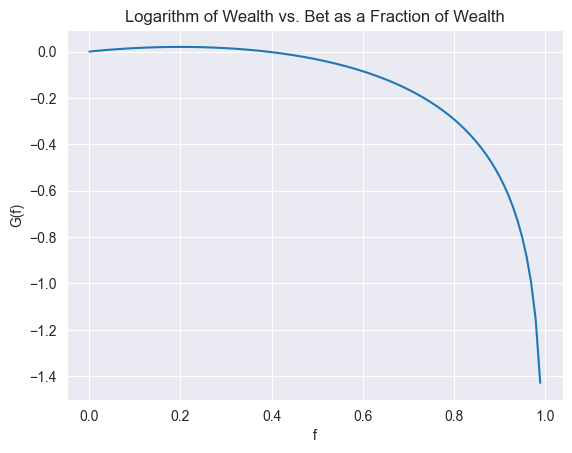

In [3]:
sns.set_style("darkgrid")
ax = sns.lineplot(x=f, y=g_f)
ax.set_xlabel("f")
ax.set_ylabel("G(f)")
ax.set_title("Logarithm of Wealth vs. Bet as a Fraction of Wealth")

In [4]:
np.max(g_f)

0.020135513550688863

In [5]:
np.argmax(g_f)

20

In [6]:
# This Makes Sense:

#f* = p/a - q/b
# .6/1 - .4/1 = .2

f[np.argmax(g_f)]

0.2

Betting in the market is different than gambling. When you make a bet in sports, if you win you get money, but if you lose you lose all of youre money. So the amount you lose of the fractional wealth that you bet is 100%. This is not the case in investing.

$$W_N = W_0 \left(1+bf\right)^{M} \left(1-af\right)^{L}$$

In [7]:
# kelly betting simulation
periods = 500
w_t = 1
w_fix = 1

# to show you barely need to win... if you have an edge you are good in the long run
p = .55
q = .45

b = .05
a = .05

f_star = p/a - q/b
f_fixed = 0.5

wealth = np.zeros(periods)
fixed = np.zeros(periods)

wealth[0] = w_t
fixed[0] = w_fix


for n in range(1, periods):
    win = random.choices([1, 0], [p, q], k=1)[0]

    if win:
        w_t *= (1+b*f_star)
        w_fix *= (1+b*f_fixed)
    else:
        w_t *= (1-a*f_star)
        w_fix *= (1-a*f_fixed)

    wealth[n] = w_t
    fixed[n] = w_fix

<AxesSubplot:>

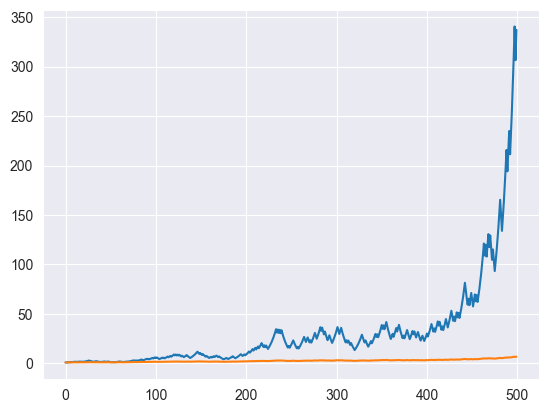

In [8]:
ax = sns.lineplot(data=wealth)
sns.lineplot(data=fixed, ax=ax)


<AxesSubplot:>

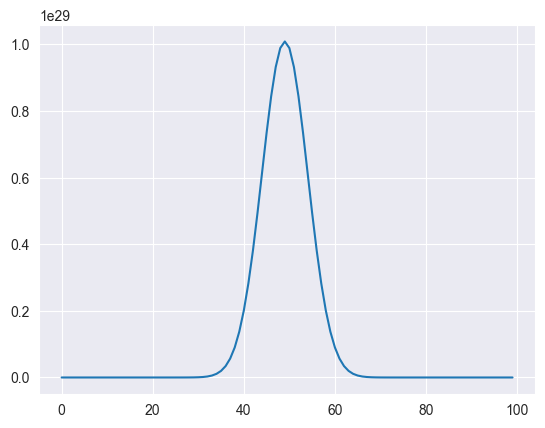

In [9]:
import numpy as np
import seaborn as sns
import math

n = 100
arr = np.zeros(n)
for k in range(1, n+1):
    arr[k-1] = math.comb(n, k)

sns.lineplot(data=arr)